In [1]:
# Import necessary modules for file and directory manipulation
import os

In [2]:
# Set the base directory for the small dataset
base_dir = './dog_cats_small'

# Define directories for training, validation, and test sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create directories for cat and dog classes within each set
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [3]:
# Display the count of images in each class for training, validation, and test sets
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total validation cat images:', len(os.listdir(val_cats_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))

print('Total training dogs images:', len(os.listdir(train_dogs_dir)))
print('Total validation dogs images:', len(os.listdir(val_dogs_dir)))
print('Total test dogs images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total validation cat images: 500
Total test cat images: 500
Total training dogs images: 1000
Total validation dogs images: 500
Total test dogs images: 500


In [5]:
# Import necessary modules for image data generation
from keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for training and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of data for training and validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# Import necessary modules for building the neural network
from keras import layers
from keras import models

# Build a convolutional neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Display a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [11]:
from keras import optimizers

# Compile the model with specified optimizer, loss function, and metrics
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [14]:
# Train the model on the training data
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 2s 20ms/step - loss: 0.2077 - acc: 0.9225 - val_loss: 0.6306 - val_acc: 0.7180
Epoch 2/30
100/100 [==============================] - 2s 19ms/step - loss: 0.1905 - acc: 0.9360 - val_loss: 0.6614 - val_acc: 0.7120
Epoch 3/30
100/100 [==============================] - 2s 18ms/step - loss: 0.1756 - acc: 0.9350 - val_loss: 0.7270 - val_acc: 0.7130
Epoch 4/30
100/100 [==============================] - 2s 17ms/step - loss: 0.1630 - acc: 0.9450 - val_loss: 0.7378 - val_acc: 0.7050
Epoch 5/30
100/100 [==============================] - 2s 20ms/step - loss: 0.1521 - acc: 0.9560 - val_loss: 0.7044 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 2s 18ms/step - loss: 0.1380 - acc: 0.9575 - val_loss: 0.7332 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 2s 18ms/step - loss: 0.1207 - acc: 0.9660 - val_loss: 0.8165 - val_acc: 0.7210
Epoch 8/30
100/100 [==============================] - 2s 18ms/step - 

In [15]:
# Save the trained model
model.save('dogs_cats_small.keras')

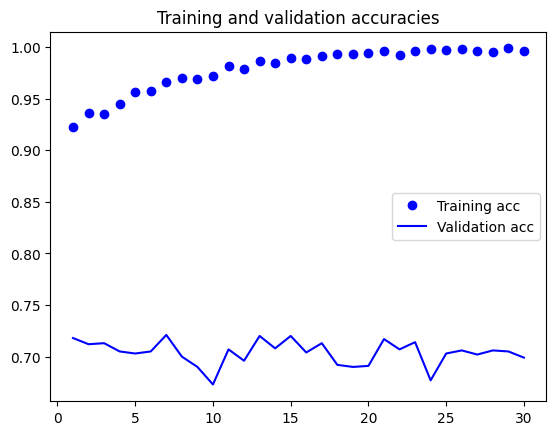

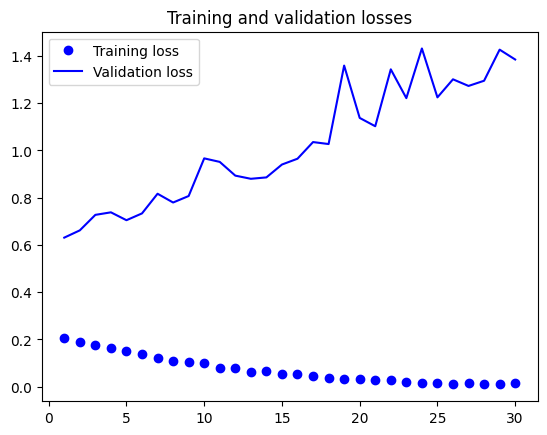

In [17]:
# Import necessary module for plotting
import matplotlib.pyplot as plt

# Plot training and validation accuracies and losses
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracies')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()

plt.show()

In [18]:
# Generate augmented images using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

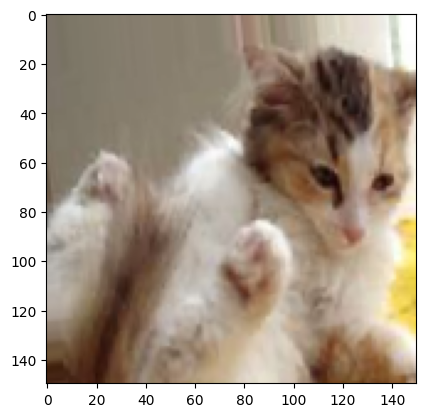

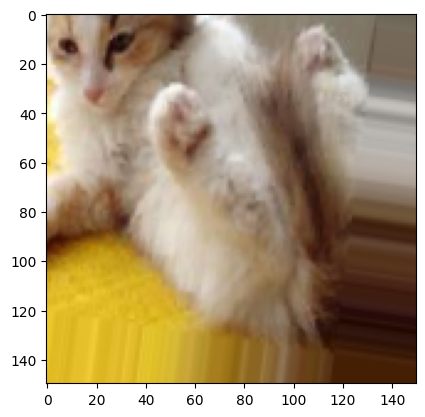

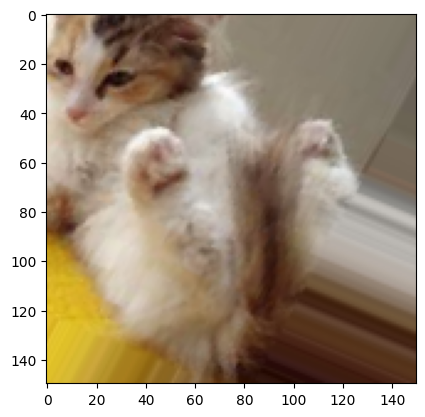

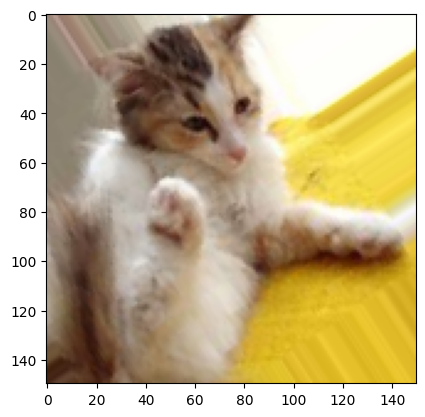

In [23]:
from keras.preprocessing import image

# Display augmented images
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break

In [24]:
# Build a new convolutional neural network model with dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the new model with specified optimizer, loss function, and metrics
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [25]:
# Create new generators with data augmentation for training and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Train the new model with augmented batches
history = model.fit(train_generator, epochs=100, validation_data=test_generator)

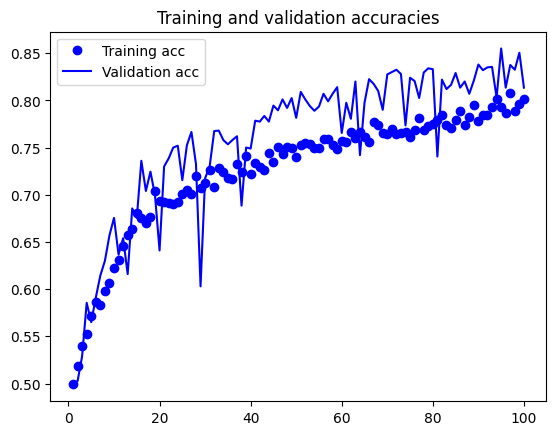

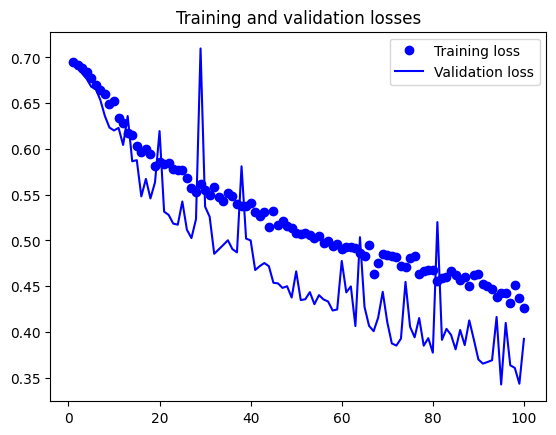

In [27]:
# Plot training and validation accuracies and losses for the new model
 = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracies')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()

plt.show()

In [28]:
from keras.applications import VGG16

# Import VGG16 model with pre-trained weights
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [29]:
# Display the summary of the VGG16 model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
import numpy as np

# Create data generators for feature extraction
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 4, 4, 512))
    labels = np.zeros((sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size:(i + 1) * batch_size] = features_batch
        labels[i * batch_size:(i + 1) * batch_size] = labels_batch
        i+=1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [32]:
# Extract features using VGG16 for training, validation, and test sets
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 11ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 11ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 13ms/step


In [33]:
# Reshape features for input to a densely connected classifier
train_features =np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features =np.reshape(validation_features, (1000, 4 * 4 *512))
test_features =np.reshape(test_features, (1000, 4 * 4 * 512))

In [34]:
# Build a densely connected classifier on top of the VGG16 features
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
# Compile the model with specified optimizer, loss function, and metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [35]:
# Train the model on the extracted features
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 3ms/step - loss: 0.5836 - acc: 0.6790 - val_loss: 0.4330 - val_acc: 0.8440
Epoch 2/30
100/100 [==============================] - 0s 2ms/step - loss: 0.4230 - acc: 0.8055 - val_loss: 0.3611 - val_acc: 0.8680
Epoch 3/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3644 - acc: 0.8460 - val_loss: 0.3322 - val_acc: 0.8780
Epoch 4/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3150 - acc: 0.8705 - val_loss: 0.2987 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2915 - acc: 0.8790 - val_loss: 0.2843 - val_acc: 0.8780
Epoch 6/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2647 - acc: 0.9000 - val_loss: 0.2724 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2499 - acc: 0.9005 - val_loss: 0.2766 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 0s 2ms/step - loss: 0.

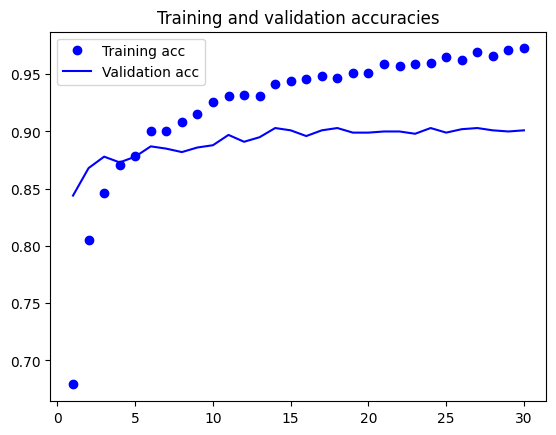

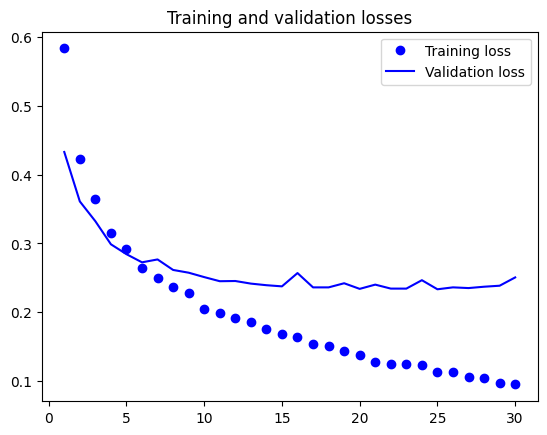

In [36]:
# Plot training and validation accuracies and losses for the densely connected classifier
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracies')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()

plt.show()

In [44]:
# Build a new model by adding a densely connected classifier on top of the VGG16 base
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
# Display the summary of the new model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2097408   
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [43]:
# Freeze the convolutional base to prevent its weights from being updated during training
conv_base.trainable = False

In [46]:
# Compile the model with specified optimizer, loss function, and metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [47]:
# Train the model on the data using the convolutional base and a densely connected classifier
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
63/63 [==============================] - 7s 101ms/step - loss: 0.5962 - acc: 0.6930 - val_loss: 0.4752 - val_acc: 0.7980
Epoch 2/30
63/63 [==============================] - 6s 96ms/step - loss: 0.5096 - acc: 0.7710 - val_loss: 0.3928 - val_acc: 0.8560
Epoch 3/30
63/63 [==============================] - 6s 95ms/step - loss: 0.4627 - acc: 0.7840 - val_loss: 0.3512 - val_acc: 0.8760
Epoch 4/30
63/63 [==============================] - 6s 97ms/step - loss: 0.4273 - acc: 0.8140 - val_loss: 0.3251 - val_acc: 0.8840
Epoch 5/30
63/63 [==============================] - 6s 95ms/step - loss: 0.4006 - acc: 0.8230 - val_loss: 0.3093 - val_acc: 0.8910
Epoch 6/30
63/63 [==============================] - 6s 99ms/step - loss: 0.4017 - acc: 0.8160 - val_loss: 0.2955 - val_acc: 0.8940
Epoch 7/30
63/63 [==============================] - 6s 98ms/step - loss: 0.3791 - acc: 0.8305 - val_loss: 0.2856 - val_acc: 0.8880
Epoch 8/30
63/63 [==============================] - 6s 99ms/step - loss: 0.3764 - 

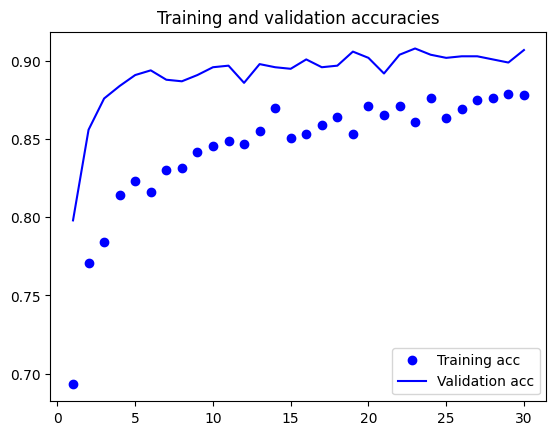

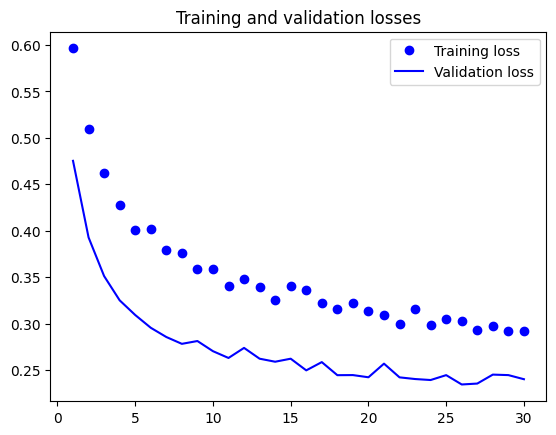

In [48]:
# Plot training and validation accuracies and losses for the fine-tuned model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracies')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()

plt.show()

In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [50]:
# Allow some layers of the convolutional base to be trainable for fine-tuning
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [51]:
# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['acc'])

In [52]:
# Train the model on the data with fine-tuning
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 7s 97ms/step - loss: 0.2958 - acc: 0.8640 - val_loss: 0.2226 - val_acc: 0.9040
Epoch 2/100
63/63 [==============================] - 6s 97ms/step - loss: 0.2575 - acc: 0.8775 - val_loss: 0.2121 - val_acc: 0.9100
Epoch 3/100
63/63 [==============================] - 6s 98ms/step - loss: 0.2389 - acc: 0.8935 - val_loss: 0.2059 - val_acc: 0.9160
Epoch 4/100
63/63 [==============================] - 6s 96ms/step - loss: 0.2235 - acc: 0.8995 - val_loss: 0.1993 - val_acc: 0.9200
Epoch 5/100
63/63 [==============================] - 6s 97ms/step - loss: 0.2162 - acc: 0.9025 - val_loss: 0.2081 - val_acc: 0.9170
Epoch 6/100
63/63 [==============================] - 6s 98ms/step - loss: 0.2062 - acc: 0.9155 - val_loss: 0.1873 - val_acc: 0.9210
Epoch 7/100
63/63 [==============================] - 6s 95ms/step - loss: 0.1992 - acc: 0.9215 - val_loss: 0.2098 - val_acc: 0.9180
Epoch 8/100
63/63 [==============================] - 6s 98ms/step - loss: 0.

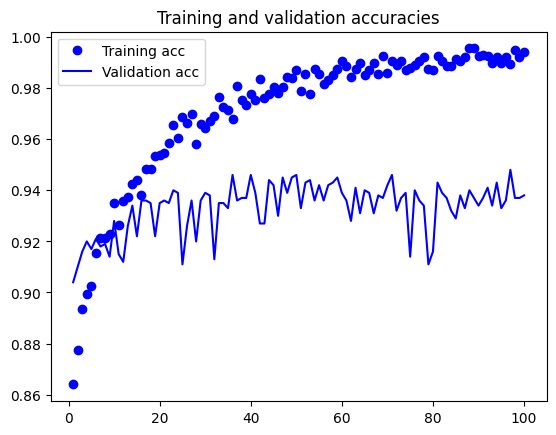

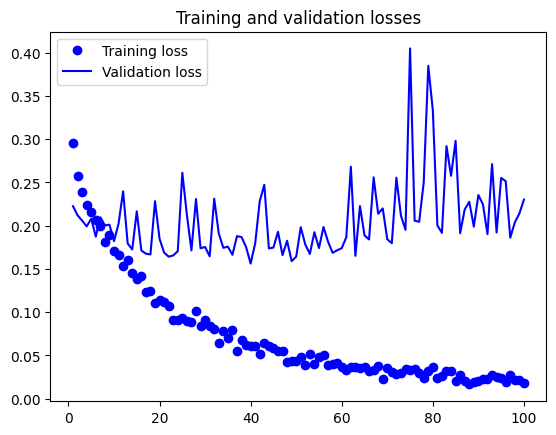

In [56]:
# Plot training and validation accuracies and losses for the fine-tuned model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracies')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()

plt.show()

In [58]:
# Evaluate the fine-tuned model on the test data
test_loss, test_acc = model.evaluate(test_generator)

63/63 [==============================] - 2s 29ms/step - loss: 0.0019 - acc: 1.0000


In [59]:
# Print the test accuracy and loss
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 1.0
Test loss: 0.0019210746977478266
